# Importing the dependencies and becoming one with the data

In [1]:
%pip install --upgrade clearml tensorboard ultralytics
import clearml

Note: you may need to restart the kernel to use updated packages.


In [2]:
%env CLEARML_WEB_HOST=https://app.clear.ml
%env CLEARML_API_HOST=https://api.clear.ml
%env CLEARML_FILES_HOST=https://files.clear.ml
%env CLEARML_API_ACCESS_KEY=K5TS42BM430WE8DJ6PEF
%env CLEARML_API_SECRET_KEY=khxChPcGVZGjRaYgM6B3ZSYxEPfJ05CbUnuk4dlrsaDcQDbGEt

env: CLEARML_WEB_HOST=https://app.clear.ml
env: CLEARML_API_HOST=https://api.clear.ml
env: CLEARML_FILES_HOST=https://files.clear.ml
env: CLEARML_API_ACCESS_KEY=K5TS42BM430WE8DJ6PEF
env: CLEARML_API_SECRET_KEY=khxChPcGVZGjRaYgM6B3ZSYxEPfJ05CbUnuk4dlrsaDcQDbGEt


In [3]:
%cd yolov5

c:\Users\ASUS\OneDrive - UGM 365\Documents\KULIAH\SEMESTER 5\BANGKIT 2023\Capstone\ModelVGG16\yolov5


In [4]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Fri Dec  8 20:28:18 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 522.06       Driver Version: 522.06       CUDA Version: 11.8     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   45C    P0    12W /  N/A |      0MiB /  4096MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [5]:
import numpy as np
import pandas as pd
import os
import cv2


In [7]:
# install dependencies as necessary
!pip install -r requirements.txt  # install dependencies (ignore errors)
import torch

from IPython.display import Image, clear_output  # to display images
from utils.downloads import attempt_download  # to download models/datasets

# clear_output()
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

Setup complete. Using torch 1.8.0+cpu CPU


ERROR: Invalid requirement: '#'


In [8]:
torch.cuda.is_available()

False

In [9]:
# Walk through directory and list number of files
%cd ../
for dirpath, dirnames, filenames in os.walk("train"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")


c:\Users\ASUS\OneDrive - UGM 365\Documents\KULIAH\SEMESTER 5\BANGKIT 2023\Capstone\ModelVGG16
There are 2 directories and 0 images in 'train'.
There are 3 directories and 0 images in 'train\Awake'.
There are 0 directories and 580 images in 'train\Awake\no_yawn'.
There are 0 directories and 581 images in 'train\Awake\Open'.
There are 0 directories and 1560 images in 'train\Awake\Open_Eyes'.
There are 3 directories and 0 images in 'train\Drowsy'.
There are 0 directories and 581 images in 'train\Drowsy\Closed'.
There are 0 directories and 1531 images in 'train\Drowsy\Closed_Eyes'.
There are 0 directories and 579 images in 'train\Drowsy\yawn'.


In [10]:
import pathlib

data_dir = pathlib.Path("train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Created a list of class_names from the subdirectories
print(class_names)


['Awake' 'Drowsy']


In [11]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def view_random_image(target_dir, target_class):
  target_folder = target_dir + target_class

  random_file = random.sample(os.listdir(target_folder), 1)

  target_folder = target_dir + target_class + "/" + random_file[0]
  random_image = random.sample(os.listdir(target_folder), 1)
  print(target_folder)

  img = mpimg.imread(target_folder +  "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}")

  return img

train/Awake/Open_Eyes
Image shape: (143, 143, 4)


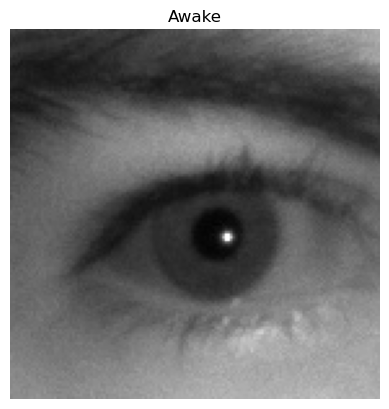

In [19]:
img = view_random_image(target_dir="train/",
                        target_class="Awake")

In [20]:
img.shape

(143, 143, 4)

In [21]:
def change_image_size(target_dir, target_class):
  target_folder = target_dir + target_class
  for image in os.listdir(target_folder):
    img = mpimg.imread(target_folder +  "/" + image)
    if len(img.shape) != 3 or img.shape[2] != 3:
      #rgb_img = np.expand_dims(img, axis=2)
      #rgb_img = np.repeat(rgb_img, repeats=3, axis=2)
      #rgb_image = (rgb_img * 255).astype(np.uint8)
      #mpimg.imsave(target_folder +  "/" + image, rgb_image)
      print(f"Image shape 2 : {img.shape}")
      

In [22]:
def toRGB(target_dir, target_class):
  target_folder = target_dir + target_class
  for image in os.listdir(target_folder):
    img = cv2.imread(target_folder +  "/" + image)
    if len(img.shape)== 3:
      rgb_image = cv2.cvtColor(img, cv2.COLOR_RGBA2RGB)
      mpimg.imsave(target_folder +  "/" + image, rgb_image)
      print(f"Image shape : {img.shape}")
      

In [23]:
change_image_size(target_dir="train/",
                        target_class="Drowsy/Closed_Eyes")

change_image_size(target_dir="train/",
                        target_class="Awake/Open_Eyes")


Image shape 2 : (84, 84, 4)
Image shape 2 : (81, 81, 4)
Image shape 2 : (78, 78, 4)
Image shape 2 : (81, 81, 4)
Image shape 2 : (81, 81, 4)
Image shape 2 : (82, 82, 4)
Image shape 2 : (82, 82, 4)
Image shape 2 : (90, 90, 4)
Image shape 2 : (83, 83, 4)
Image shape 2 : (84, 84, 4)
Image shape 2 : (84, 84, 4)
Image shape 2 : (87, 87, 4)
Image shape 2 : (97, 97, 4)
Image shape 2 : (76, 76, 4)
Image shape 2 : (97, 97, 4)
Image shape 2 : (82, 82, 4)
Image shape 2 : (96, 96, 4)
Image shape 2 : (80, 80, 4)
Image shape 2 : (80, 80, 4)
Image shape 2 : (96, 96, 4)
Image shape 2 : (86, 86, 4)
Image shape 2 : (88, 88, 4)
Image shape 2 : (94, 94, 4)
Image shape 2 : (83, 83, 4)
Image shape 2 : (106, 106, 4)
Image shape 2 : (93, 93, 4)
Image shape 2 : (110, 110, 4)
Image shape 2 : (107, 107, 4)
Image shape 2 : (110, 110, 4)
Image shape 2 : (109, 109, 4)
Image shape 2 : (79, 79, 4)
Image shape 2 : (75, 75, 4)
Image shape 2 : (87, 87, 4)
Image shape 2 : (88, 88, 4)
Image shape 2 : (83, 83, 4)
Image shap

In [24]:
toRGB(target_dir="train/",
                        target_class="Drowsy/Closed_Eyes")
toRGB(target_dir="train/",
                        target_class="Awake/Open_Eyes")

Image shape : (84, 84, 3)
Image shape : (81, 81, 3)
Image shape : (78, 78, 3)
Image shape : (81, 81, 3)
Image shape : (81, 81, 3)
Image shape : (82, 82, 3)
Image shape : (82, 82, 3)
Image shape : (90, 90, 3)
Image shape : (83, 83, 3)
Image shape : (84, 84, 3)
Image shape : (84, 84, 3)
Image shape : (87, 87, 3)
Image shape : (97, 97, 3)
Image shape : (76, 76, 3)
Image shape : (97, 97, 3)
Image shape : (82, 82, 3)
Image shape : (96, 96, 3)
Image shape : (80, 80, 3)
Image shape : (80, 80, 3)
Image shape : (96, 96, 3)
Image shape : (86, 86, 3)
Image shape : (88, 88, 3)
Image shape : (94, 94, 3)
Image shape : (83, 83, 3)
Image shape : (106, 106, 3)
Image shape : (93, 93, 3)
Image shape : (110, 110, 3)
Image shape : (107, 107, 3)
Image shape : (110, 110, 3)
Image shape : (109, 109, 3)
Image shape : (79, 79, 3)
Image shape : (75, 75, 3)
Image shape : (87, 87, 3)
Image shape : (88, 88, 3)
Image shape : (83, 83, 3)
Image shape : (106, 106, 3)
Image shape : (79, 79, 3)
Image shape : (104, 104, 3

train/Awake/Open
Image shape: (540, 540, 3)
train/Drowsy/Closed_Eyes
Image shape: (130, 130, 4)


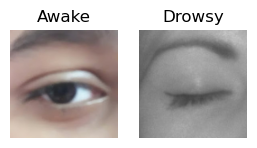

In [42]:
# Visualize the data
plt.figure()
plt.subplot(1, 4, 1)
closed_img = view_random_image("train/", "Awake")
plt.subplot(1, 4, 2)
open_img = view_random_image("train/", "Drowsy")

In [45]:
for dirpath, dirnames, filenames in os.walk("train"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")
for dirpath, dirnames, filenames in os.walk("test"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'train'.
There are 3 directories and 0 images in 'train\Awake'.
There are 0 directories and 580 images in 'train\Awake\no_yawn'.
There are 0 directories and 581 images in 'train\Awake\Open'.
There are 0 directories and 1560 images in 'train\Awake\Open_Eyes'.
There are 3 directories and 0 images in 'train\Drowsy'.
There are 0 directories and 581 images in 'train\Drowsy\Closed'.
There are 0 directories and 1531 images in 'train\Drowsy\Closed_Eyes'.
There are 0 directories and 579 images in 'train\Drowsy\yawn'.
There are 2 directories and 0 images in 'test'.
There are 3 directories and 0 images in 'test\Awake'.
There are 0 directories and 116 images in 'test\Awake\no_yawn'.
There are 0 directories and 116 images in 'test\Awake\Open'.
There are 0 directories and 312 images in 'test\Awake\Open_Eyes'.
There are 3 directories and 0 images in 'test\Drowsy'.
There are 0 directories and 116 images in 'test\Drowsy\Closed'.
There are 0 directories and 306 im

# Creating the Model

In [47]:
%pip install keras

Note: you may need to restart the kernel to use updated packages.


In [48]:
from keras.layers import Input, Lambda, Dense, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from keras.models import Model
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import keras

In [49]:
BATCH_SIZE = 32

In [50]:
train_data_gen = ImageDataGenerator(rescale=1./255, validation_split= 0.2)

test_data_gen = ImageDataGenerator(rescale=1./255)

train_data = train_data_gen.flow_from_directory("train",
                                                target_size=(80,80),
                                                batch_size=BATCH_SIZE,
                                                class_mode='categorical',
                                                subset='training')

validation_data = train_data_gen.flow_from_directory("train",
                                                     target_size=(80,80),
                                                     batch_size=BATCH_SIZE,
                                                     class_mode='categorical',
                                                     subset= 'validation')

test_data = test_data_gen.flow_from_directory("test",
                                              target_size=(80,80),
                                              batch_size=BATCH_SIZE,
                                              class_mode='categorical')


Found 4330 images belonging to 2 classes.
Found 1082 images belonging to 2 classes.
Found 1081 images belonging to 2 classes.


In [51]:
from keras.applications import VGG16

baseModel = VGG16(
    include_top=False,
    pooling='avg',
    weights='imagenet',
    classes=2,
)

baseModel.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [52]:
headModel = baseModel.output
headModel = Flatten()(headModel)
headModel = Dense(128, activation='relu')(headModel)
headModel = Dropout(0.3)(headModel)
headModel = Dense(2, activation='softmax')(headModel)

model = Model(inputs=baseModel.input, outputs=headModel)

for layer in baseModel.layers:
    layer.trainable = False

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.build(input_shape=(None, 80,80,3))

model.summary()

steps_per_epoch_training = len(train_data)
steps_per_epoch_validation = len(validation_data)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

# Model training

In [53]:
from keras.callbacks import ModelCheckpoint,EarlyStopping, ReduceLROnPlateau

earlystop = EarlyStopping(monitor = 'val_loss', patience=7, verbose= 3, restore_best_weights=True)

learning_rate = ReduceLROnPlateau(monitor= 'val_loss', patience=3, verbose= 3, )

callbacks=[earlystop,learning_rate]

## VGG16

In [54]:
history = model.fit(train_data, epochs=50,
                                  steps_per_epoch = steps_per_epoch_training,
                                  validation_steps = steps_per_epoch_validation,
                                  validation_data = validation_data,
                                  callbacks=callbacks, verbose=1)

Epoch 1/50
136/136 [==============================] - 51s 370ms/step - loss: 0.4602 - accuracy: 0.7838 - val_loss: 0.2281 - val_accuracy: 0.9196 - lr: 0.0010
Epoch 2/50
136/136 [==============================] - 55s 406ms/step - loss: 0.3077 - accuracy: 0.8635 - val_loss: 0.1796 - val_accuracy: 0.9316 - lr: 0.0010
Epoch 3/50
136/136 [==============================] - 55s 407ms/step - loss: 0.2624 - accuracy: 0.8836 - val_loss: 0.1731 - val_accuracy: 0.9288 - lr: 0.0010
Epoch 4/50
136/136 [==============================] - 53s 387ms/step - loss: 0.2373 - accuracy: 0.8942 - val_loss: 0.1649 - val_accuracy: 0.9288 - lr: 0.0010
Epoch 5/50
136/136 [==============================] - 52s 385ms/step - loss: 0.2162 - accuracy: 0.9079 - val_loss: 0.1676 - val_accuracy: 0.9353 - lr: 0.0010
Epoch 6/50
136/136 [==============================] - 53s 386ms/step - loss: 0.1930 - accuracy: 0.9171 - val_loss: 0.1789 - val_accuracy: 0.9316 - lr: 0.0010
Epoch 7/50
136/136 [==============================] 

# Plot the Data

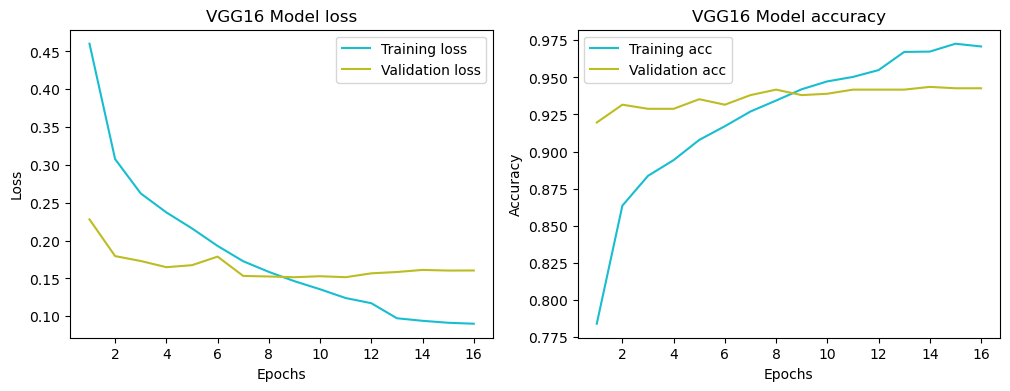

In [56]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'C9', label='Training loss')
plt.plot(epochs, val_loss, 'C8', label='Validation loss')
plt.title('VGG16 Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc, 'C9', label='Training acc')
plt.plot(epochs, val_acc, 'C8', label='Validation acc')
plt.title('VGG16 Model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# VGG16

In [57]:
score = model.evaluate_generator(train_data)

print('Loss: {:.4f}'.format(score[0]))
print('Accuracy: {:.4f}'.format(score[1]))

C:\Users\ASUS\AppData\Local\Temp\ipykernel_10348\1124430595.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  score = model.evaluate_generator(train_data)


Loss: 0.1217
Accuracy: 0.9520


In [58]:
score = model.evaluate_generator(validation_data)
print('Loss: {:.4f}'.format(score[0]))
print('Accuracy: {:.4f}'.format(score[1]))

C:\Users\ASUS\AppData\Local\Temp\ipykernel_10348\4185909775.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  score = model.evaluate_generator(validation_data)


Loss: 0.1517
Accuracy: 0.9381


In [59]:
score = model.evaluate_generator(test_data)
print('Loss: {:.4f}'.format(score[0]))
print('Accuracy: {:.4f}'.format(score[1]))

C:\Users\ASUS\AppData\Local\Temp\ipykernel_10348\1871922516.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  score = model.evaluate_generator(test_data)


Loss: 0.1238
Accuracy: 0.9611


In [61]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

In [71]:
Y_pred = model.predict(validation_data, batch_size = BATCH_SIZE)
y_pred = np.argmax(Y_pred, axis=1)

print('Classification Report')
classification_rep = classification_report(validation_data.classes, y_pred, 
                                           target_names = class_names, digits = 4)
print(classification_rep)

34/34 [==============================] - 16s 449ms/step
Classification Report
              precision    recall  f1-score   support

       Awake     0.5373    0.5165    0.5267       544
      Drowsy     0.5295    0.5502    0.5397       538

    accuracy                         0.5333      1082
   macro avg     0.5334    0.5334    0.5332      1082
weighted avg     0.5334    0.5333    0.5331      1082



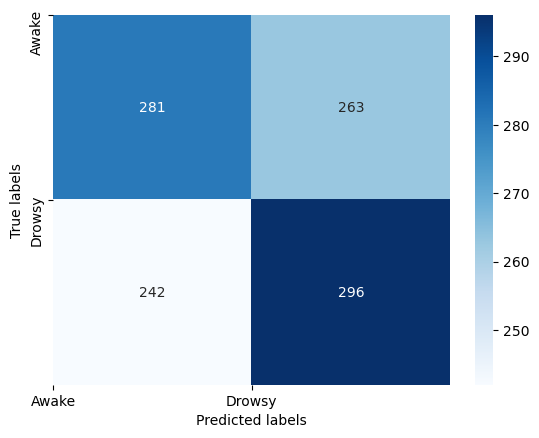

In [72]:
import seaborn as sns

y_true = validation_data.classes
cm = confusion_matrix(y_true, y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [77]:
SAVED_MODEL = "models"
tf.saved_model.save(model, SAVED_MODEL)
loaded = tf.saved_model.load(SAVED_MODEL)

INFO:tensorflow:Assets written to: model/my_model\assets


INFO:tensorflow:Assets written to: model/my_model\assets


In [ ]:
SAVED_MODEL_H5 = "models/model_v1.h5"
model.save(model, SAVED_MODEL_H5)

In [79]:
converter = tf.lite.TFLiteConverter.from_saved_model(SAVED_MODEL)

converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()

In [80]:
tflite_model_file = 'models/model_v1.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)